In [134]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import *

In [177]:
def delta(v_t_fire):
    if v_t_fire == 1.:
        return 1
    else:
        return 0

def simple_REI_model(r_t, e_t, ina_t, u_t, t_rec, t_ina, t_fac, U, dt, v_t_fire):
    du = - u_t / t_fac + U * (1 - u_t) * delta(v_t_fire) *(1/dt)
    u_t = u_t + du * dt
    
    dr = ina_t / t_rec - u_t * r_t * delta(v_t_fire) *(1/dt)
    de = - e_t / t_ina + u_t * r_t * delta(v_t_fire) * (1/dt)
    dina = e_t / t_ina - ina_t / t_rec
    
    r_t_ = r_t + dr * dt
    e_t_ = e_t + de * dt
    ina_t_ = ina_t + dina * dt

    r_t_ = r_t_ /(r_t_ + e_t_ + ina_t_)
    e_t_ = e_t_ /(r_t_ + e_t_ + ina_t_)
    ina_t_ = ina_t_ /(r_t_ + e_t_ + ina_t_)
    return r_t_, e_t_, ina_t_, u_t

def IF_neuron(v_t, t_mem, R_mem, I_syn, I_ext, dt, v_t_fire, current_time, i_th_neuron):
    dv = (- v_t + R_mem * (I_syn + I_ext)) / t_mem
    v_t_ = v_t + dv * dt
    if v_t_ >= 15.:
        v_t_ = 13.5
        v_t_fire[i_th_neuron, current_time] = 1.
        #print("neuron fired !")
    
    return v_t_

def raster(event_times_list, **kwargs):
    """
    Creates a raster plot
    Parameters
    ----------
    event_times_list : iterable
                       a list of event time iterables
    color : string
            color of vlines
    Returns
    -------
    ax : an axis containing the raster plot
    """
    ax = plt.gca()
    for ith, trial in enumerate(event_times_list):
        plt.vlines(trial, ith + .5, ith + 1.5, **kwargs)
    plt.ylim(.5, len(event_times_list) + .5)
    return ax

In [178]:
A_ij = np.empty((0, 30))
for i in range(27):
    tmp = np.zeros((1,30))
    for j in range(30):
        if randint(4) % 4 == 1:
            if j<27:
                tmp[0, j] = 1.8
            else:
                tmp[0, j] = 5.4
    A_ij = np.append(A_ij, tmp, axis = 0)
for i in range(3):
    tmp = np.zeros((1, 30))
    for j in range(30):
        if randint(4) % 4 == 1:
            tmp[0, j] = 7.2
    A_ij = np.append(A_ij, tmp, axis = 0)
#print(A_ij.dtype)
#print(A_ij.shape)
print(A_ij)

[[0.  0.  0.  1.8 0.  0.  1.8 0.  0.  0.  0.  1.8 1.8 0.  0.  0.  0.  0.
  0.  0.  0.  1.8 0.  0.  0.  0.  0.  0.  5.4 0. ]
 [0.  0.  1.8 0.  0.  0.  0.  1.8 1.8 0.  0.  0.  0.  0.  1.8 0.  0.  0.
  1.8 0.  1.8 0.  0.  0.  0.  0.  0.  0.  5.4 0. ]
 [0.  1.8 0.  1.8 0.  1.8 0.  1.8 1.8 0.  0.  0.  0.  1.8 1.8 0.  1.8 1.8
  0.  0.  0.  0.  0.  1.8 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.8 1.8 0.  1.8 1.8 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.8
  0.  0.  1.8 0.  0.  0.  0.  0.  1.8 0.  0.  0. ]
 [0.  1.8 0.  0.  0.  0.  0.  0.  1.8 0.  0.  1.8 0.  1.8 0.  0.  1.8 0.
  0.  1.8 0.  0.  1.8 1.8 0.  0.  0.  0.  0.  0. ]
 [1.8 0.  0.  0.  1.8 1.8 1.8 0.  0.  1.8 0.  1.8 1.8 0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.8 1.8 1.8 0.  0.  5.4 0. ]
 [0.  1.8 0.  0.  0.  0.  0.  1.8 0.  1.8 0.  0.  1.8 0.  0.  0.  1.8 1.8
  0.  0.  1.8 0.  0.  1.8 0.  0.  1.8 5.4 0.  0. ]
 [0.  1.8 0.  0.  1.8 0.  0.  0.  0.  0.  1.8 0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.8 1.8 1.8 1.8 0.  0.  5.4 5.4]
 [0. 

In [179]:
R_mem_i = np.zeros(30)
for i in range(30):
    R_mem_i[i] = np.random.uniform(high = 0.7, low = 0.2, size =1)

In [180]:
r = 0.5
e = 0.5
ina = 1 - r - e
u = 0.02

#mili second
t_rec = 200
t_ina = 10
t_fac = 3000

U_e = 0.5
U_i = 0.04

I_ext = np.random.normal(loc = 0.86, scale = 0.15, size = 1)

t_mem = 10

dt = 0.01

T = 1000 * (1/dt)
intT = int(T)

time = np.zeros(intT)

v_t = np.zeros((30, intT))
v_t_fire = np.zeros((30, intT))
r_t = np.zeros((intT, 30, 30))
e_t = np.zeros((intT, 30, 30))
ina_t = np.zeros((intT, 30, 30,))
u_t = np.zeros((intT, 30, 30))

# for debugging
I_syn = np.zeros(intT)

v_t[:,0] = 0.
r_t[0, :, :] = r
e_t[0, :, :] = e
ina_t[0, :, :] = ina
u_t[0, :, :] = u

for t in range(intT - 1):
    # this is i * dt mili second
    time[t+1] = t * dt
    if (t +1) % 100 == 0:
        print("this is time {}".format(t * dt))
        I_ext = np.random.normal(loc = 15 - 0.05, scale = 15 + 0.05, size = 1)
    for i in range(30):
        # calculate the variable of i_th neuron
        I_syn_i = 0.
        for j in range(30):
            # j_th synapse of i_th neuron
            # calculate I_syn = sum_of A_ij * e_t_ij
            if j == i:
                pass
            else:
                #if i == 0:
                #    print("{} I_syn_{}".format(A_ij[j, i] * e_t[t, j, i], i))
                #    print("{} e_{}".format(e_t[t, :, :],t))
                #    print("{} r_t[t, i, j], {} e_t[t, i, j], {} ina_t[t, i, j], {} u_t[t, i, j]".format(r_t[t, i, j], e_t[t, i, j], ina_t[t, i, j], u_t[t, i, j]))
                if i < 27:
                    r_t[t+1, i, j], e_t[t+1, i, j], ina_t[t+1, i, j], u_t[t+1, i, j] = simple_REI_model(r_t[t, i, j], e_t[t, i, j], ina_t[t, i, j], u_t[t, i, j], t_rec, t_ina, t_fac, U_e, dt, v_t_fire[i, t])
                else:
                    r_t[t+1, i, j], e_t[t+1, i, j], ina_t[t+1, i, j], u_t[t+1, i, j] = simple_REI_model(r_t[t, i, j], e_t[t, i, j], ina_t[t, i, j], u_t[t, i, j], t_rec, t_ina, t_fac, U_i, dt, v_t_fire[i, t])
            I_syn_i += A_ij[j, i] * e_t[t, j, i]
        #if i == 0:
        #    print("{} I_syn_i total".format(I_syn_i))
        v_t[i, t+1] = IF_neuron(v_t[i, t], t_mem, R_mem_i[i], I_syn_i, I_ext, dt, v_t_fire, t, i)  

this is time 0.99
this is time 1.99
this is time 2.99
this is time 3.99
this is time 4.99
this is time 5.99
this is time 6.99
this is time 7.99
this is time 8.99
this is time 9.99
this is time 10.99
this is time 11.99
this is time 12.99
this is time 13.99
this is time 14.99
this is time 15.99
this is time 16.990000000000002
this is time 17.990000000000002
this is time 18.990000000000002
this is time 19.990000000000002
this is time 20.990000000000002
this is time 21.990000000000002
this is time 22.990000000000002
this is time 23.990000000000002
this is time 24.990000000000002
this is time 25.990000000000002
this is time 26.990000000000002
this is time 27.990000000000002
this is time 28.990000000000002
this is time 29.990000000000002
this is time 30.990000000000002
this is time 31.990000000000002
this is time 32.99
this is time 33.99
this is time 34.99
this is time 35.99
this is time 36.99
this is time 37.99
this is time 38.99
this is time 39.99
this is time 40.99
this is time 41.99
this

this is time 385.99
this is time 386.99
this is time 387.99
this is time 388.99
this is time 389.99
this is time 390.99
this is time 391.99
this is time 392.99
this is time 393.99
this is time 394.99
this is time 395.99
this is time 396.99
this is time 397.99
this is time 398.99
this is time 399.99
this is time 400.99
this is time 401.99
this is time 402.99
this is time 403.99
this is time 404.99
this is time 405.99
this is time 406.99
this is time 407.99
this is time 408.99
this is time 409.99
this is time 410.99
this is time 411.99
this is time 412.99
this is time 413.99
this is time 414.99
this is time 415.99
this is time 416.99
this is time 417.99
this is time 418.99
this is time 419.99
this is time 420.99
this is time 421.99
this is time 422.99
this is time 423.99
this is time 424.99
this is time 425.99
this is time 426.99
this is time 427.99
this is time 428.99
this is time 429.99
this is time 430.99
this is time 431.99
this is time 432.99
this is time 433.99
this is time 434.99


this is time 795.99
this is time 796.99
this is time 797.99
this is time 798.99
this is time 799.99
this is time 800.99
this is time 801.99
this is time 802.99
this is time 803.99
this is time 804.99
this is time 805.99
this is time 806.99
this is time 807.99
this is time 808.99
this is time 809.99
this is time 810.99
this is time 811.99
this is time 812.99
this is time 813.99
this is time 814.99
this is time 815.99
this is time 816.99
this is time 817.99
this is time 818.99
this is time 819.99
this is time 820.99
this is time 821.99
this is time 822.99
this is time 823.99
this is time 824.99
this is time 825.99
this is time 826.99
this is time 827.99
this is time 828.99
this is time 829.99
this is time 830.99
this is time 831.99
this is time 832.99
this is time 833.99
this is time 834.99
this is time 835.99
this is time 836.99
this is time 837.99
this is time 838.99
this is time 839.99
this is time 840.99
this is time 841.99
this is time 842.99
this is time 843.99
this is time 844.99


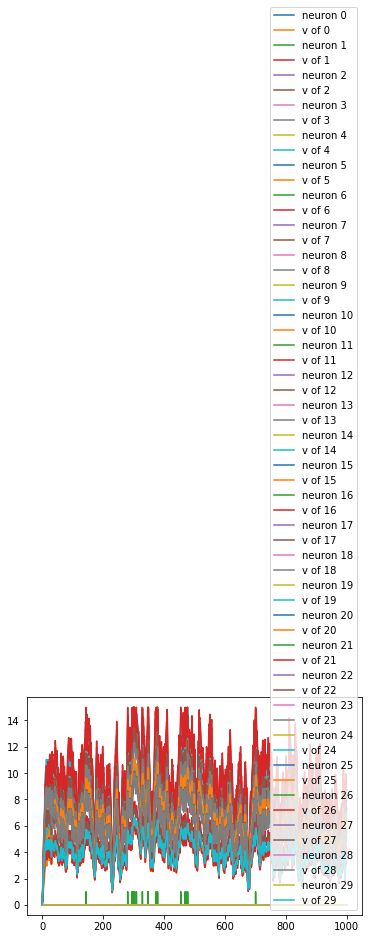

In [181]:
#plt.plot(time, v_t_fire[0, :], label='neuron1')
#plt.plot(time, v_t_fire[1, :], label='neuron2')
#plt.plot(time, u_t[:, 0, 0], label='u_t')

for i in range(30):
    plt.plot(time, v_t_fire[i, :], label='neuron {}'.format(i))
    plt.plot(time, v_t[i, :], label='v of {}'.format(i))

plt.legend(loc="lower right")

6th neuron fired spike appended
6th neuron fired spike appended
6th neuron fired spike appended
6th neuron fired spike appended
9th neuron fired spike appended
9th neuron fired spike appended
16th neuron fired spike appended
16th neuron fired spike appended
16th neuron fired spike appended
16th neuron fired spike appended
16th neuron fired spike appended
16th neuron fired spike appended
16th neuron fired spike appended
16th neuron fired spike appended
16th neuron fired spike appended
16th neuron fired spike appended
16th neuron fired spike appended
16th neuron fired spike appended
16th neuron fired spike appended
16th neuron fired spike appended
21th neuron fired spike appended
21th neuron fired spike appended
21th neuron fired spike appended
21th neuron fired spike appended
21th neuron fired spike appended
21th neuron fired spike appended
21th neuron fired spike appended


/Users/soliton/.pyenv/versions/anaconda3-4.2.0/envs/dynamicsenv/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


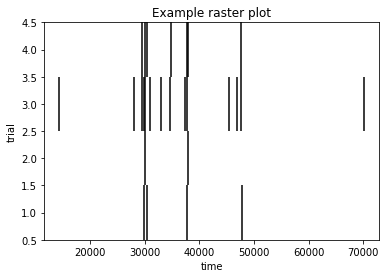

In [183]:
spikes = []

for j in [6, 9, 16, 21]:
    spike = []
    for i in range(intT):
        if v_t_fire[j,i] == 1:
            spike.append(i)
            print("{}th neuron fired spike appended".format(j))
    spikes.append(spike)
            
fig = plt.figure()
ax = raster(spikes)
plt.title('Example raster plot')
plt.xlabel('time')
plt.ylabel('trial')
fig.show()